In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
dataset = pd.read_csv('Dataset/Pollution_Dataset.csv')

In [3]:
dataset.head(3)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate


In [4]:
dataset.shape

(5000, 10)

In [5]:
dataset.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [6]:
dataset.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


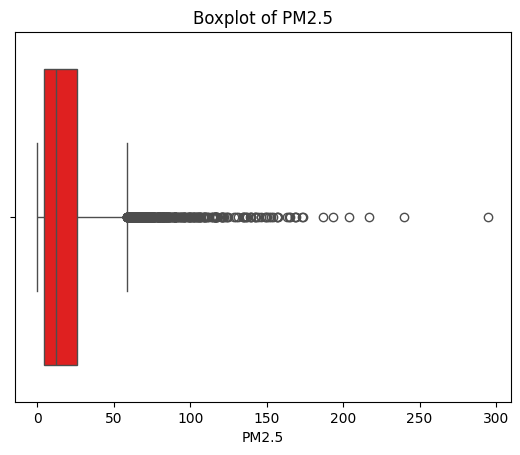

In [7]:
sns.boxplot(x = dataset['PM2.5'], color = 'red')
plt.title('Boxplot of PM2.5')
plt.xlabel('PM2.5')
plt.show()

In [8]:
q1 = dataset['PM2.5'].quantile(0.25)
q3 = dataset['PM2.5'].quantile(0.75)
iqr = q3 - q1

lower_bound = max(0, q1 - 1.5 * iqr)
upper_bound = q3 + 1.5 * iqr

no_outliers = dataset[(dataset['PM2.5'] >= lower_bound) & (dataset['PM2.5'] <= upper_bound)]
print(no_outliers)

      Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0            29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1            28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2            23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3            27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4            26.5      70.7    6.9  16.0  21.9   5.6  1.01   
...           ...       ...    ...   ...   ...   ...   ...   
4993         34.9      77.7   32.3  47.1  17.4  11.5  1.63   
4994         31.1      61.0   27.1  31.1  13.0   3.8  0.98   
4996         28.1      96.9    6.9  25.0  25.3  10.8  1.54   
4997         25.9      78.2   14.2  22.1  34.8   7.8  1.63   
4998         25.3      44.4   21.4  29.0  23.7   5.7  0.89   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                               6.3                 319    Moderate  
1                               6.0                 611    Moderate  
2                               5.2          

In [9]:
dataset = no_outliers

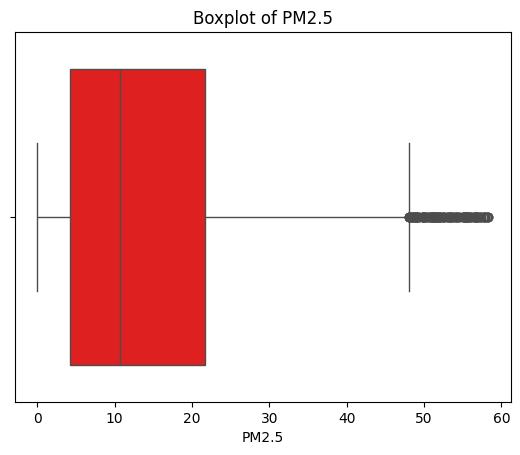

In [10]:
sns.boxplot(x = dataset['PM2.5'], color = 'red')
plt.title('Boxplot of PM2.5')
plt.xlabel('PM2.5')
plt.show()

In [11]:
dataset.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000
mean,29.585564,69.239673,14.937177,24.598623,25.805142,9.624763,1.457302,8.629604,488.692341
std,6.501903,15.633128,13.618944,16.447904,8.613076,6.506117,0.521511,3.600453,150.181944
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,24.900000,57.400000,4.200000,11.700000,19.700000,5.000000,1.020000,5.500000,374.000000
50%,28.600000,68.950000,10.700000,20.200000,24.750000,7.700000,1.360000,8.550000,486.500000
75%,33.300000,79.400000,21.725000,33.300000,31.000000,13.000000,1.770000,11.125000,591.000000
max,58.600000,128.100000,58.300000,85.700000,64.900000,44.900000,3.650000,25.800000,951.000000


In [12]:
dataset.head(3)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate


In [13]:
dataset['Air Quality'].value_counts()

Air Quality
Good         1995
Moderate     1418
Poor          860
Hazardous     375
Name: count, dtype: int64

In [14]:
dataset['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
encoded_data = le.fit_transform(dataset['Air Quality'])

In [18]:
dataset['Air Quality'] = encoded_data

In [19]:
dataset['Air Quality'].value_counts()

Air Quality
0    1995
2    1418
3     860
1     375
Name: count, dtype: int64

0  -->  Good  
1  -->  Hazardious  
2  -->  Moderate  
3  -->  Poor  

In [20]:
dataset.head(3)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = dataset.drop('Air Quality', axis = 1)
y = dataset['Air Quality']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier()

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
rf.score(X_test, y_test)*100, rf.score(X_train, y_train)*100

(95.6989247311828, 99.97310381925767)

In [28]:
rf.predict([[29.8,	59.1,	5.2,	17.9,	18.9,	9.2,	1.72,	6.3,	319]])

c:\Users\sulav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)*100, lr.score(X_train, y_train)*100

c:\Users\sulav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(79.03225806451613, 79.28994082840237)

In [30]:
y_predict = rf.predict(X_test)

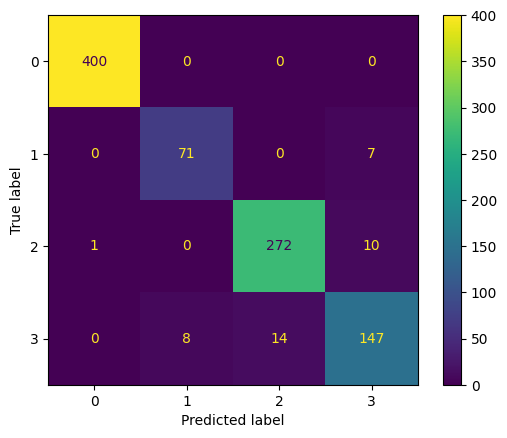

In [31]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

In [32]:
dataset.shape

(4648, 10)

In [33]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.90      0.91      0.90        78
           2       0.95      0.96      0.96       283
           3       0.90      0.87      0.88       169

    accuracy                           0.96       930
   macro avg       0.94      0.94      0.94       930
weighted avg       0.96      0.96      0.96       930



In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 20, 30, 40, 50]}
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'max_depth': 30, 'n_estimators': 400}

In [38]:
rf2 = RandomForestClassifier(max_depth = 30, n_estimators = 400)
rf2.fit(X_train, y_train)
rf2.score(X_test, y_test)*100, rf2.score(X_train, y_train)*100

(95.91397849462365, 100.0)

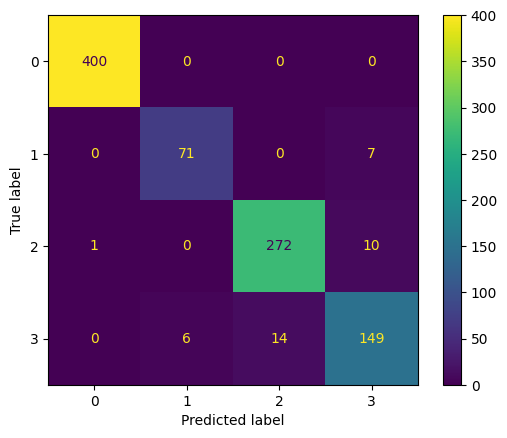

In [39]:
cm2 = confusion_matrix(y_test, rf2.predict(X_test))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=rf2.classes_)
disp2.plot()
plt.show()